# Autores:

### Bryam Guzman

### Adrian Tene

# Repositorio GitHub

https://github.com/bguzman012/Neumonia_ML

# Importando librerias

In [15]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras.layers import InputLayer
import re
import pandas as pd
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
from PIL import Image
from sklearn.metrics import classification_report
import keras
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.decomposition import PCA
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf  
print('importadas')

importadas


# Exploracion de imagenes del dataset

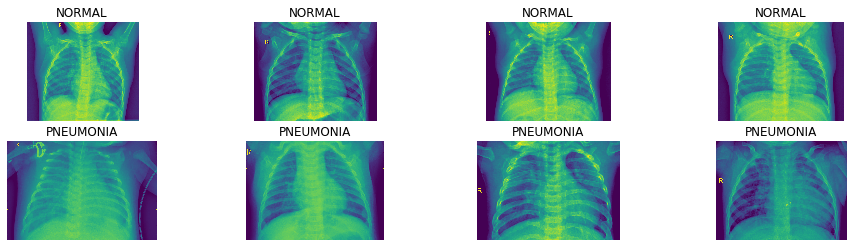

In [5]:
#Clases del DATASET
classes=['NORMAL', 'PNEUMONIA']
#Displaying theImages
%matplotlib inline

#Se mostrar un grafico de 4 imagenes de cada dataset divido en 2 * 4
nrows=2
ncols=4

pic_index=0

#Obtiene la figura actual [plt.gcf()]
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*2)

pic_index+=4

#Se utiliza el método os.path.join () para unir varios componentes de ruta y os.listdir devuelve una lista que contiene 
#los nombres de las entradas en el directorio dado por ruta.

next_a_pix = [os.path.join('train/'+classes[0]+'/' ,fname) for fname in os.listdir('train/'+classes[0]+'/')[pic_index-4:pic_index]]

next_b_pix = [os.path.join('train/'+classes[1]+'/' ,fname) for fname in os.listdir('train/'+classes[1]+'/')[pic_index-4:pic_index]]

#Graficando imagenes de cada clase
j=0
for i, img_path in enumerate(next_a_pix+next_b_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

  if i%4==0 and i>=4:
    j=j+1
  sp.title.set_text(classes[j])

  
plt.show()

# CNN(Otros Parametros)

## Carga de datos

In [2]:
dirname = os.path.join(os.getcwd(), 'train')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        #Se puede leer imagenes de todo tipo
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)

            #Preprocesamiento de la imagen
            #Debido a que el tamanio de las imagenes varia, se debe poner un size de (150,150) a todas
            image = keras.preprocessing.image.load_img(filepath, grayscale=False, color_mode="rgb", target_size=(128, 128))
            #Se transforma la imagen cargada a vector
            input_arr = keras.preprocessing.image.img_to_array(image)
            #se guardas las imagenes convertidas en vector, en una lista
            images.append(input_arr)
            b = "Leyendo..." + str(cant)
            cant=cant+1
            print (b, end="\r")
            #Criterio de parada
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
#Numero de carpetas leidas, en este caso e ha leido [Alien, Predator]
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\NORMAL 1
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\PNEUMONIA 1341
Directorios leidos: 2
Imagenes en cada directorio [1342, 3874]
suma Total de imagenes en subdirs: 5216


In [3]:
labelsX=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        #Guardar las etiquetas en una lista(en numeros 1 y 0)
        labelsX.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labelsX))

etiquetasX=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    #Guardar los nombres de etiquetas en una lista
    etiquetasX.append(name[len(name)-1])
    indice=indice+1
#Se convierte en vector la lista de etiquetas anteriormente creada
y = np.array(labelsX)
#Se convierte en vector la lista de imagenes creada anteriormente
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
print(classes)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print(y.shape[0])

Cantidad etiquetas creadas:  5216
0 NORMAL
1 PNEUMONIA
[0 1]
Total number of outputs :  2
Output classes :  [0 1]
5216


In [4]:
#Se realiza el mismo proceso para 'test'
dirname = os.path.join(os.getcwd(), 'test')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)

            #Preprocesamiento de la imagen
            image = keras.preprocessing.image.load_img(filepath, grayscale=False, color_mode="rgb", target_size=(128, 128))
            input_arr = keras.preprocessing.image.img_to_array(image)
           
            
            images.append(input_arr)
            cant=cant+1
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
                
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\NORMAL 1
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\PNEUMONIA 234
Directorios leidos: 2
Imagenes en cada directorio [235, 389]
suma Total de imagenes en subdirs: 624


In [5]:
#Se realiza el mismo proceso para 'test'
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
etiquetas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    etiquetas.append(name[len(name)-1])
    indice=indice+1
 
y_test = np.array(labels)
X_test = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y_test)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  624
0 NORMAL
1 PNEUMONIA
Total number of outputs :  2
Output classes :  [0 1]


## Preprocesamiento 

In [6]:
print('Training data shape : ', X.shape, y.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)
#Realizar un reshape del vetor X
X = X.reshape(X.shape[0], 3, 128, 128)
#Realizar un reshape del vetor X_test
X_test = X_test.reshape(X_test.shape[0], 3, 128, 128)

print('Estructuras de X')
print('train:',X.shape)
print('test:',X_test.shape)
print('Se hace transpose de X (las imagenes)')
#Realizar un transpose del vetor X
X = X.transpose(0, 2, 3, 1) #enviamos al final el número de canales
#Realizar un transpose del vetor X_test
X_test = X_test.transpose(0, 2, 3, 1)
print('train:',X.shape)
print('test:',X_test.shape)

Training data shape :  (5216, 128, 128, 3) (5216,)
Testing data shape :  (624, 128, 128, 3) (624,)
Estructuras de X
train: (5216, 3, 128, 128)
test: (624, 3, 128, 128)
Se hace transpose de X (las imagenes)
train: (5216, 128, 128, 3)
test: (624, 128, 128, 3)


In [7]:
x = X/255
x_test = X_test/255

print("Normalización lista")
#Ejemplo para verificar
print('x:',X_test[100,1,1,1])
print("""x':""",x_test[100,1,1,1])

Normalización lista
x: 0
x': 0.0


# Guardando Dataset Preprocesado

## Train( X )

In [9]:
datasetPreprocesadoX = pd.DataFrame(list(map(np.ravel, x)))

In [12]:
datasetPreprocesadoX.to_csv('datasetPreprocesadoXtrain.csv')

## Train( Y )

In [13]:
datasetPreprocesadoY = pd.DataFrame(list(map(np.ravel, y)))

In [17]:
datasetPreprocesadoY.to_csv('datasetPreprocesadoYtrain.csv')

## Test( X )

In [19]:
datasetPreprocesadoXtest = pd.DataFrame(list(map(np.ravel, x_test)))

In [20]:
datasetPreprocesadoXtest.to_csv('datasetPreprocesadoXtest.csv')

## Test( Y )

In [21]:
datasetPreprocesadoYtest = pd.DataFrame(list(map(np.ravel, y_test)))

In [22]:
datasetPreprocesadoYtest.to_csv('datasetPreprocesadoYtest.csv')

## Modelo

In [29]:
#iniciamos el modelo
model = Sequential()
#Añadimos una capa convolucional con 32 filtros de 3píxeles de ancho x 3píxeles de altura. Vamos a aplicarlo a cada imagen. 
#Cada filtro sería de: 3x3x3. 
model.add(Conv2D(8, (5, 5), padding="same", activation='relu', input_shape = X.shape[1:]))
#añadimos una capa de pooling de 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

#repetimos todas las capas otra vez
model.add(Conv2D(8, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#repetimos todas las capas otra vez
model.add(Conv2D(16, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#repetimos todas las capas otra vez
model.add(Conv2D(16, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#añadimos una capa para aplanar la estructura y convertir en una matriz
model.add(Flatten())
#añadimos una capa con 256 neuronas

model.add(Dense(128, activation='relu'))

#Tenemos dos clases, por lo tanto, la salida sera de dos 
model.add(Dense(2, activation='softmax'))

In [30]:
model.compile(optimizer='adam',
   loss='sparse_categorical_crossentropy',
   metrics = ['acc']
   )

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 8)       608       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 8)         1608      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        3216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 16)       

In [33]:
from time import time #importamos la función time para capturar tiempos
 
tiempo_inicial = time() 

size_batch = 16
epocas = 50
history = model.fit(x, y, batch_size= size_batch, epochs=epocas, validation_data = (x_test, y_test), verbose=1)

tiempo_final = time() 
 
tiempo_ejecucionCNN = tiempo_final - tiempo_inicial
 


Train on 5216 samples, validate on 624 samples
Epoch 1/50
5216/5216 [==============================] - 150s 29ms/step - loss: 0.2192 - acc: 0.9120 - val_loss: 0.8474 - val_acc: 0.7163
Epoch 2/50
5216/5216 [==============================] - 136s 26ms/step - loss: 0.1502 - acc: 0.9410 - val_loss: 0.7607 - val_acc: 0.7516
Epoch 3/50
5216/5216 [==============================] - 156s 30ms/step - loss: 0.1363 - acc: 0.9490 - val_loss: 0.8511 - val_acc: 0.7484
Epoch 4/50
5216/5216 [==============================] - 174s 33ms/step - loss: 0.1284 - acc: 0.9503 - val_loss: 0.7250 - val_acc: 0.7484
Epoch 5/50
5216/5216 [==============================] - 170s 33ms/step - loss: 0.1109 - acc: 0.9601 - val_loss: 0.9051 - val_acc: 0.7676
Epoch 6/50
5216/5216 [==============================] - 159s 31ms/step - loss: 0.0937 - acc: 0.9647 - val_loss: 1.0529 - val_acc: 0.7324
Epoch 7/50
5216/5216 [==============================] - 161s 31ms/step - loss: 0.0918 - acc: 0.9645 - val_loss: 1.3225 - val_acc: 0

NameError: name 'tiempo_ejecucion' is not defined

In [34]:
print(tiempo_ejecucionCNN/60, "Minutos")

145.98052178621293 Minutos


In [35]:
model.evaluate(x_test, y_test)
#Se ha obtenido un accuracy no tan malo, pero la perdida es bastante considerable y al momento de predecir no dara un 
#resultado erroneo

624/624 [==============================] - 4s 7ms/step


[5.187170368534568, 0.754807710647583]

## Grafica

<Figure size 432x288 with 0 Axes>

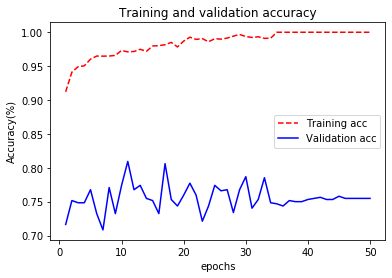

<Figure size 432x288 with 0 Axes>

In [36]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

#Grafica de la historia de Accuracy
plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('Accuracy(%)')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [37]:
# architecture to JSON, weights to HDF5
#Solo se ha guardado el modelo optimizado, pues el modelo base, nada mas sirvio para demostrar la mejora que se ha
#obtenido con el modelo optimizado, el modelo base es obsoleto
model.save_weights('pesos.h5')
with open('architectura.json', 'w') as f:
    f.write(model.to_json())

# CNN-PCA

In [15]:
dirname = os.path.join(os.getcwd(), 'train')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        #Se puede leer imagenes de todo tipo
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)

            #Preprocesamiento de la imagen
            #Debido a que el tamanio de las imagenes varia, se debe poner un size de (150,150) a todas
            image = keras.preprocessing.image.load_img(filepath, grayscale=False, color_mode="rgb", target_size=(128, 128))
            
            #Se transforma la imagen cargada a vector
            input_arr = keras.preprocessing.image.img_to_array(image)
            
            img_r = np.reshape(input_arr, (128, 384)) 
            print(img_r.shape)
            #se guardas las imagenes convertidas en vector, en una lista
            ipca = PCA(45).fit(img_r) 
            img_c = ipca.transform(img_r) 
            np.size(ipca.explained_variance_ratio_)
            temp = ipca.inverse_transform(img_c) 
            temp = np.reshape(temp, (128,128,3)) 
            images.append(temp)
            b = "Leyendo..." + str(cant)
            cant=cant+1
            print (b, end="\r")
            #Criterio de parada
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
#Numero de carpetas leidas, en este caso e ha leido [Alien, Predator]
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\
(128, 384)
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\NORMAL 1
(128, 384)
(128, 384)0
(128, 384)1
(128, 384)2
(128, 384)3
(128, 384)4
(128, 384)5
(128, 384)6
(128, 384)7
(128, 384)8
(128, 384)9
(128, 384)10
(128, 384)11
(128, 384)12
(128, 384)13
(128, 384)14
(128, 384)15
(128, 384)16
(128, 384)17
(128, 384)18
(128, 384)19
(128, 384)20
(128, 384)21
(128, 384)22
(128, 384)23
(128, 384)24
(128, 384)25
(128, 384)26
(128, 384)27
(128, 384)28
(128, 384)29
(128, 384)30
(128, 384)31
(128, 384)32
(128, 384)33
(128, 384)34
(128, 384)35
(128, 384)36
(128, 384)37
(128, 384)38
(128, 384)39
(128, 384)40
(128, 384)41
(128, 384)42
(128, 384)43
(128, 384)44
(128, 384)45
(128, 384)46
(128, 384)47
(128, 384)48
(128, 384)49
(128, 384)50
(128, 384)51
(128, 384)52
(128, 384)53
(128, 384)54
(128, 384)55
(128, 384)56
(128, 384)57
(128, 384)58
(128, 384)59
(128, 384)60
(128, 

(128, 384)581
(128, 384)582
(128, 384)583
(128, 384)584
(128, 384)585
(128, 384)586
(128, 384)587
(128, 384)588
(128, 384)589
(128, 384)590
(128, 384)591
(128, 384)592
(128, 384)593
(128, 384)594
(128, 384)595
(128, 384)596
(128, 384)597
(128, 384)598
(128, 384)599
(128, 384)600
(128, 384)601
(128, 384)602
(128, 384)603
(128, 384)604
(128, 384)605
(128, 384)606
(128, 384)607
(128, 384)608
(128, 384)609
(128, 384)610
(128, 384)611
(128, 384)612
(128, 384)613
(128, 384)614
(128, 384)615
(128, 384)616
(128, 384)617
(128, 384)618
(128, 384)619
(128, 384)620
(128, 384)621
(128, 384)622
(128, 384)623
(128, 384)624
(128, 384)625
(128, 384)626
(128, 384)627
(128, 384)628
(128, 384)629
(128, 384)630
(128, 384)631
(128, 384)632
(128, 384)633
(128, 384)634
(128, 384)635
(128, 384)636
(128, 384)637
(128, 384)638
(128, 384)639
(128, 384)640
(128, 384)641
(128, 384)642
(128, 384)643
(128, 384)644
(128, 384)645
(128, 384)646
(128, 384)647
(128, 384)648
(128, 384)649
(128, 384)650
(128, 384)651
(128, 

(128, 384)1156
(128, 384)1157
(128, 384)1158
(128, 384)1159
(128, 384)1160
(128, 384)1161
(128, 384)1162
(128, 384)1163
(128, 384)1164
(128, 384)1165
(128, 384)1166
(128, 384)1167
(128, 384)1168
(128, 384)1169
(128, 384)1170
(128, 384)1171
(128, 384)1172
(128, 384)1173
(128, 384)1174
(128, 384)1175
(128, 384)1176
(128, 384)1177
(128, 384)1178
(128, 384)1179
(128, 384)1180
(128, 384)1181
(128, 384)1182
(128, 384)1183
(128, 384)1184
(128, 384)1185
(128, 384)1186
(128, 384)1187
(128, 384)1188
(128, 384)1189
(128, 384)1190
(128, 384)1191
(128, 384)1192
(128, 384)1193
(128, 384)1194
(128, 384)1195
(128, 384)1196
(128, 384)1197
(128, 384)1198
(128, 384)1199
(128, 384)1200
(128, 384)1201
(128, 384)1202
(128, 384)1203
(128, 384)1204
(128, 384)1205
(128, 384)1206
(128, 384)1207
(128, 384)1208
(128, 384)1209
(128, 384)1210
(128, 384)1211
(128, 384)1212
(128, 384)1213
(128, 384)1214
(128, 384)1215
(128, 384)1216
(128, 384)1217
(128, 384)1218
(128, 384)1219
(128, 384)1220
(128, 384)1221
(128, 384)

(128, 384)389
(128, 384)390
(128, 384)391
(128, 384)392
(128, 384)393
(128, 384)394
(128, 384)395
(128, 384)396
(128, 384)397
(128, 384)398
(128, 384)399
(128, 384)400
(128, 384)401
(128, 384)402
(128, 384)403
(128, 384)404
(128, 384)405
(128, 384)406
(128, 384)407
(128, 384)408
(128, 384)409
(128, 384)410
(128, 384)411
(128, 384)412
(128, 384)413
(128, 384)414
(128, 384)415
(128, 384)416
(128, 384)417
(128, 384)418
(128, 384)419
(128, 384)420
(128, 384)421
(128, 384)422
(128, 384)423
(128, 384)424
(128, 384)425
(128, 384)426
(128, 384)427
(128, 384)428
(128, 384)429
(128, 384)430
(128, 384)431
(128, 384)432
(128, 384)433
(128, 384)434
(128, 384)435
(128, 384)436
(128, 384)437
(128, 384)438
(128, 384)439
(128, 384)440
(128, 384)441
(128, 384)442
(128, 384)443
(128, 384)444
(128, 384)445
(128, 384)446
(128, 384)447
(128, 384)448
(128, 384)449
(128, 384)450
(128, 384)451
(128, 384)452
(128, 384)453
(128, 384)454
(128, 384)455
(128, 384)456
(128, 384)457
(128, 384)458
(128, 384)459
(128, 

(128, 384)977
(128, 384)978
(128, 384)979
(128, 384)980
(128, 384)981
(128, 384)982
(128, 384)983
(128, 384)984
(128, 384)985
(128, 384)986
(128, 384)987
(128, 384)988
(128, 384)989
(128, 384)990
(128, 384)991
(128, 384)992
(128, 384)993
(128, 384)994
(128, 384)995
(128, 384)996
(128, 384)997
(128, 384)998
(128, 384)999
(128, 384)1000
(128, 384)1001
(128, 384)1002
(128, 384)1003
(128, 384)1004
(128, 384)1005
(128, 384)1006
(128, 384)1007
(128, 384)1008
(128, 384)1009
(128, 384)1010
(128, 384)1011
(128, 384)1012
(128, 384)1013
(128, 384)1014
(128, 384)1015
(128, 384)1016
(128, 384)1017
(128, 384)1018
(128, 384)1019
(128, 384)1020
(128, 384)1021
(128, 384)1022
(128, 384)1023
(128, 384)1024
(128, 384)1025
(128, 384)1026
(128, 384)1027
(128, 384)1028
(128, 384)1029
(128, 384)1030
(128, 384)1031
(128, 384)1032
(128, 384)1033
(128, 384)1034
(128, 384)1035
(128, 384)1036
(128, 384)1037
(128, 384)1038
(128, 384)1039
(128, 384)1040
(128, 384)1041
(128, 384)1042
(128, 384)1043
(128, 384)1044
(12

(128, 384)2073
(128, 384)2074
(128, 384)2075
(128, 384)2076
(128, 384)2077
(128, 384)2078
(128, 384)2079
(128, 384)2080
(128, 384)2081
(128, 384)2082
(128, 384)2083
(128, 384)2084
(128, 384)2085
(128, 384)2086
(128, 384)2087
(128, 384)2088
(128, 384)2089
(128, 384)2090
(128, 384)2091
(128, 384)2092
(128, 384)2093
(128, 384)2094
(128, 384)2095
(128, 384)2096
(128, 384)2097
(128, 384)2098
(128, 384)2099
(128, 384)2100
(128, 384)2101
(128, 384)2102
(128, 384)2103
(128, 384)2104
(128, 384)2105
(128, 384)2106
(128, 384)2107
(128, 384)2108
(128, 384)2109
(128, 384)2110
(128, 384)2111
(128, 384)2112
(128, 384)2113
(128, 384)2114
(128, 384)2115
(128, 384)2116
(128, 384)2117
(128, 384)2118
(128, 384)2119
(128, 384)2120
(128, 384)2121
(128, 384)2122
(128, 384)2123
(128, 384)2124
(128, 384)2125
(128, 384)2126
(128, 384)2127
(128, 384)2128
(128, 384)2129
(128, 384)2130
(128, 384)2131
(128, 384)2132
(128, 384)2133
(128, 384)2134
(128, 384)2135
(128, 384)2136
(128, 384)2137
(128, 384)2138
(128, 384)

(128, 384)2623
(128, 384)2624
(128, 384)2625
(128, 384)2626
(128, 384)2627
(128, 384)2628
(128, 384)2629
(128, 384)2630
(128, 384)2631
(128, 384)2632
(128, 384)2633
(128, 384)2634
(128, 384)2635
(128, 384)2636
(128, 384)2637
(128, 384)2638
(128, 384)2639
(128, 384)2640
(128, 384)2641
(128, 384)2642
(128, 384)2643
(128, 384)2644
(128, 384)2645
(128, 384)2646
(128, 384)2647
(128, 384)2648
(128, 384)2649
(128, 384)2650
(128, 384)2651
(128, 384)2652
(128, 384)2653
(128, 384)2654
(128, 384)2655
(128, 384)2656
(128, 384)2657
(128, 384)2658
(128, 384)2659
(128, 384)2660
(128, 384)2661
(128, 384)2662
(128, 384)2663
(128, 384)2664
(128, 384)2665
(128, 384)2666
(128, 384)2667
(128, 384)2668
(128, 384)2669
(128, 384)2670
(128, 384)2671
(128, 384)2672
(128, 384)2673
(128, 384)2674
(128, 384)2675
(128, 384)2676
(128, 384)2677
(128, 384)2678
(128, 384)2679
(128, 384)2680
(128, 384)2681
(128, 384)2682
(128, 384)2683
(128, 384)2684
(128, 384)2685
(128, 384)2686
(128, 384)2687
(128, 384)2688
(128, 384)

(128, 384)3170
(128, 384)3171
(128, 384)3172
(128, 384)3173
(128, 384)3174
(128, 384)3175
(128, 384)3176
(128, 384)3177
(128, 384)3178
(128, 384)3179
(128, 384)3180
(128, 384)3181
(128, 384)3182
(128, 384)3183
(128, 384)3184
(128, 384)3185
(128, 384)3186
(128, 384)3187
(128, 384)3188
(128, 384)3189
(128, 384)3190
(128, 384)3191
(128, 384)3192
(128, 384)3193
(128, 384)3194
(128, 384)3195
(128, 384)3196
(128, 384)3197
(128, 384)3198
(128, 384)3199
(128, 384)3200
(128, 384)3201
(128, 384)3202
(128, 384)3203
(128, 384)3204
(128, 384)3205
(128, 384)3206
(128, 384)3207
(128, 384)3208
(128, 384)3209
(128, 384)3210
(128, 384)3211
(128, 384)3212
(128, 384)3213
(128, 384)3214
(128, 384)3215
(128, 384)3216
(128, 384)3217
(128, 384)3218
(128, 384)3219
(128, 384)3220
(128, 384)3221
(128, 384)3222
(128, 384)3223
(128, 384)3224
(128, 384)3225
(128, 384)3226
(128, 384)3227
(128, 384)3228
(128, 384)3229
(128, 384)3230
(128, 384)3231
(128, 384)3232
(128, 384)3233
(128, 384)3234
(128, 384)3235
(128, 384)

In [16]:
labelsX=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        #Guardar las etiquetas en una lista(en numeros 1 y 0)
        labelsX.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labelsX))

etiquetasX=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    #Guardar los nombres de etiquetas en una lista
    etiquetasX.append(name[len(name)-1])
    indice=indice+1
#Se convierte en vector la lista de etiquetas anteriormente creada
y = np.array(labelsX)
#Se convierte en vector la lista de imagenes creada anteriormente
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
print(classes)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print(y.shape[0])

Cantidad etiquetas creadas:  5216
0 NORMAL
1 PNEUMONIA
[0 1]
Total number of outputs :  2
Output classes :  [0 1]
5216


In [ ]:
#Se realiza el mismo proceso para 'validation'
dirname = os.path.join(os.getcwd(), 'test')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)

            #Preprocesamiento de la imagen
            image = keras.preprocessing.image.load_img(filepath, grayscale=False, color_mode="rgb", target_size=(150, 150))
            input_arr = keras.preprocessing.image.img_to_array(image)
           
            
            images.append(input_arr)
            cant=cant+1
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
                
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

In [17]:
dirname = os.path.join(os.getcwd(), 'test')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        #Se puede leer imagenes de todo tipo
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)

            #Preprocesamiento de la imagen
            #Debido a que el tamanio de las imagenes varia, se debe poner un size de (150,150) a todas
            image = keras.preprocessing.image.load_img(filepath, grayscale=False, color_mode="rgb", target_size=(128, 128))
            
            #Se transforma la imagen cargada a vector
            input_arr = keras.preprocessing.image.img_to_array(image)
            
            img_r = np.reshape(input_arr, (128, 384)) 
            #se guardas las imagenes convertidas en vector, en una lista
            ipca = PCA(45).fit(img_r) 
            img_c = ipca.transform(img_r) 
            np.size(ipca.explained_variance_ratio_)
            temp = ipca.inverse_transform(img_c) 
            temp = np.reshape(temp, (128,128,3)) 
            images.append(temp)
            b = "Leyendo..." + str(cant)
            cant=cant+1
            print (b, end="\r")
            #Criterio de parada
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
#Numero de carpetas leidas, en este caso e ha leido [Alien, Predator]
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\NORMAL 1
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\PNEUMONIA 234
Directorios leidos: 2
Imagenes en cada directorio [235, 389]
suma Total de imagenes en subdirs: 624


In [18]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
etiquetas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    etiquetas.append(name[len(name)-1])
    indice=indice+1
 
y_test = np.array(labels)
X_test = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y_test)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  624
0 NORMAL
1 PNEUMONIA
Total number of outputs :  2
Output classes :  [0 1]


In [19]:
print('\nEstadísticas del dataset')
print('Samples (cantidad de imágenes): {}'.format(len(X)))
print('Cantidad de Etiquetas: {}'.format(dict(zip(*np.unique(labelsX, return_counts=True)))))


Estadísticas del dataset
Samples (cantidad de imágenes): 5216
Cantidad de Etiquetas: {0: 1342, 1: 3874}


In [20]:
def display_stats(sample_id):
    #Obtener la imagen de X
    sample_image = X[sample_id]
    #Obtener el numero de etiqueta de y
    number_y = y[sample_id]
    #Obtener el nombre de etiqueta 
    nombre = etiquetasX[number_y]
    print('\nImagen {}'.format(sample_id))
    print('Imagen - Valor Min: {} Valor Max: {}'.format(sample_image.min(), sample_image.max()))
    print('Imagen - Shape: {}'.format(sample_image.shape))
    print('Etiqueta - Etiqueta Id: {}'.format(number_y))
    print('Nombre: {}'.format(nombre))
    plt.axis('off')
    plt.imshow(sample_image)


Imagen 500
Imagen - Valor Min: 0 Valor Max: 255
Imagen - Shape: (128, 128, 3)
Etiqueta - Etiqueta Id: 0
Nombre: NORMAL


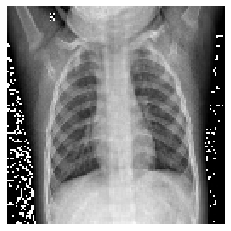

In [21]:
display_stats(500)

In [22]:
print('Training data shape : ', X.shape, y.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)
#Realizar un reshape del vetor X
X = X.reshape(X.shape[0], 3, 128, 128)
#Realizar un reshape del vetor X_test
X_test = X_test.reshape(X_test.shape[0], 3, 128, 128)

print('Estructuras de X')
print('train:',X.shape)
print('test:',X_test.shape)
print('Se hace transpose de X (las imagenes)')
#Realizar un transpose del vetor X
X = X.transpose(0, 2, 3, 1) #enviamos al final el número de canales
#Realizar un transpose del vetor X_test
X_test = X_test.transpose(0, 2, 3, 1)
print('train:',X.shape)
print('test:',X_test.shape)

Training data shape :  (5216, 128, 128, 3) (5216,)
Testing data shape :  (624, 128, 128, 3) (624,)
Estructuras de X
train: (5216, 3, 128, 128)
test: (624, 3, 128, 128)
Se hace transpose de X (las imagenes)
train: (5216, 128, 128, 3)
test: (624, 128, 128, 3)


In [23]:
x = X/255
x_test = X_test/255

print("Normalización lista")
#Ejemplo para verificar
print('x:',X_test[100,1,1,1])
print("""x':""",x_test[100,1,1,1])

Normalización lista
x: 0
x': 0.0


## Modelo

In [26]:
#iniciamos el modelo
model = Sequential()
#Añadimos una capa convolucional con 32 filtros de 3píxeles de ancho x 3píxeles de altura. Vamos a aplicarlo a cada imagen. 
#Cada filtro sería de: 3x3x3. 
model.add(Conv2D(8, (5, 5), padding="same", activation='relu', input_shape = X.shape[1:]))
#añadimos una capa de pooling de 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

#repetimos todas las capas otra vez
model.add(Conv2D(8, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#repetimos todas las capas otra vez
model.add(Conv2D(16, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#repetimos todas las capas otra vez
model.add(Conv2D(16, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#añadimos una capa para aplanar la estructura y convertir en una matriz
model.add(Flatten())
#añadimos una capa con 256 neuronas

model.add(Dense(128, activation='relu'))

#Tenemos dos clases, por lo tanto, la salida sera de dos 
model.add(Dense(2, activation='softmax'))

In [27]:
model.compile(optimizer='adam',
   loss='sparse_categorical_crossentropy',
   metrics = ['acc']
   )

In [28]:
from time import time #importamos la función time para capturar tiempos
 
tiempo_inicial = time() 

size_batch = 16
epocas = 50
history = model.fit(x, y, batch_size= size_batch, epochs=epocas, validation_data = (x_test, y_test), verbose=1)

tiempo_final = time() 
 
tiempo_ejecucionPCACNN = tiempo_final - tiempo_inicial
 
print('El tiempo de ejecucion fue:',tiempo_ejecucion) #En segundos

Train on 5216 samples, validate on 624 samples
Epoch 1/50
5216/5216 [==============================] - 123s 24ms/step - loss: 0.2774 - acc: 0.8861 - val_loss: 0.6103 - val_acc: 0.7756
Epoch 2/50
5216/5216 [==============================] - 127s 24ms/step - loss: 0.1695 - acc: 0.9360 - val_loss: 0.7900 - val_acc: 0.7532
Epoch 3/50
5216/5216 [==============================] - 127s 24ms/step - loss: 0.1369 - acc: 0.9475 - val_loss: 0.5119 - val_acc: 0.8237
Epoch 4/50
5216/5216 [==============================] - 126s 24ms/step - loss: 0.1302 - acc: 0.9517 - val_loss: 0.9985 - val_acc: 0.7324
Epoch 5/50
5216/5216 [==============================] - 121s 23ms/step - loss: 0.1089 - acc: 0.9567 - val_loss: 0.5645 - val_acc: 0.7981
Epoch 6/50
5216/5216 [==============================] - 124s 24ms/step - loss: 0.0954 - acc: 0.9659 - val_loss: 0.9277 - val_acc: 0.7532
Epoch 7/50
5216/5216 [==============================] - 120s 23ms/step - loss: 0.0978 - acc: 0.9620 - val_loss: 1.3037 - val_acc: 0

NameError: name 'tiempo_ejecucion' is not defined

In [30]:
print(tiempo_ejecucionPCACNN/60, "Minutos")

102.50519589980443 Minutos


In [31]:
model.evaluate(x_test, y_test)
#Se ha obtenido un accuracy no tan malo, pero la perdida es bastante considerable y al momento de predecir no dara un 
#resultado erroneo


624/624 [==============================] - 3s 5ms/step


[5.307892169261027, 0.7339743375778198]

## Grafica

<Figure size 432x288 with 0 Axes>

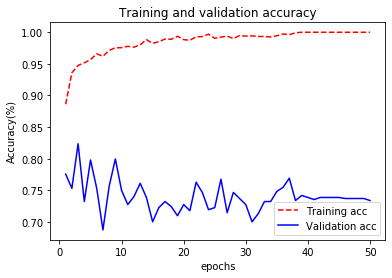

<Figure size 432x288 with 0 Axes>

In [32]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

#Grafica de la historia de Accuracy
plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('Accuracy(%)')
plt.xlabel('epochs')

plt.legend()
plt.figure()


## Guardando modelo

In [33]:
# architecture to JSON, weights to HDF5
#Solo se ha guardado el modelo optimizado, pues el modelo base, nada mas sirvio para demostrar la mejora que se ha
#obtenido con el modelo optimizado, el modelo base es obsoleto
model.save_weights('pesos_PCA.h5')
with open('architectura_PCA.json', 'w') as f:
    f.write(model.to_json())

# SVM

In [9]:
#Modulos necesarios para realizar la carga y graficar las imagenes
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

## Carga de datos

In [48]:
dirname = os.path.join(os.getcwd(), 'train')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        #Se puede leer imagenes de todo tipo
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)

            gray = cv2.imread(filepath)
            # resize la imagen e invierte a fondo negro
            gray = cv2.resize(gray, (128, 128))
            #Se debe redimensionar para que la imagen tenga la dimendion de entrada de la SVM, tiene que ser de una sola dimension pues 
            #las imagenes viene con una dimension de 3
            new_img = gray.reshape((gray.shape[0]*gray.shape[1]*gray.shape[2]))
            
            print(new_img.shape)
            images.append(new_img)
            b = "Leyendo..." + str(cant)
            cant=cant+1
            print (b, end="\r")
            #Criterio de parada
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
#Numero de carpetas leidas, en este caso e ha leido [Alien, Predator]
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\
(49152,)
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\NORMAL 1
(49152,)
(49152,)..0
(49152,)..1
(49152,)..2
(49152,)..3
(49152,)..4
(49152,)..5
(49152,)..6
(49152,)..7
(49152,)..8
(49152,)..9
(49152,)..10
(49152,)..11
(49152,)..12
(49152,)..13
(49152,)..14
(49152,)..15
(49152,)..16
(49152,)..17
(49152,)..18
(49152,)..19
(49152,)..20
(49152,)..21
(49152,)..22
(49152,)..23
(49152,)..24
(49152,)..25
(49152,)..26
(49152,)..27
(49152,)..28
(49152,)..29
(49152,)..30
(49152,)..31
(49152,)..32
(49152,)..33
(49152,)..34
(49152,)..35
(49152,)..36
(49152,)..37
(49152,)..38
(49152,)..39
(49152,)..40
(49152,)..41
(49152,)..42
(49152,)..43
(49152,)..44
(49152,)..45
(49152,)..46
(49152,)..47
(49152,)..48
(49152,)..49
(49152,)..50
(49152,)..51
(49152,)..52
(49152,)..53
(49152,)..54
(49152,)..55
(49152,)..56
(49152,)..57
(49152,)..58
(49152,)..59
(49152,)..60
(49152,)..

(49152,)..579
(49152,)..580
(49152,)..581
(49152,)..582
(49152,)..583
(49152,)..584
(49152,)..585
(49152,)..586
(49152,)..587
(49152,)..588
(49152,)..589
(49152,)..590
(49152,)..591
(49152,)..592
(49152,)..593
(49152,)..594
(49152,)..595
(49152,)..596
(49152,)..597
(49152,)..598
(49152,)..599
(49152,)..600
(49152,)..601
(49152,)..602
(49152,)..603
(49152,)..604
(49152,)..605
(49152,)..606
(49152,)..607
(49152,)..608
(49152,)..609
(49152,)..610
(49152,)..611
(49152,)..612
(49152,)..613
(49152,)..614
(49152,)..615
(49152,)..616
(49152,)..617
(49152,)..618
(49152,)..619
(49152,)..620
(49152,)..621
(49152,)..622
(49152,)..623
(49152,)..624
(49152,)..625
(49152,)..626
(49152,)..627
(49152,)..628
(49152,)..629
(49152,)..630
(49152,)..631
(49152,)..632
(49152,)..633
(49152,)..634
(49152,)..635
(49152,)..636
(49152,)..637
(49152,)..638
(49152,)..639
(49152,)..640
(49152,)..641
(49152,)..642
(49152,)..643
(49152,)..644
(49152,)..645
(49152,)..646
(49152,)..647
(49152,)..648
(49152,)..649
(49152

(49152,)..1154
(49152,)..1155
(49152,)..1156
(49152,)..1157
(49152,)..1158
(49152,)..1159
(49152,)..1160
(49152,)..1161
(49152,)..1162
(49152,)..1163
(49152,)..1164
(49152,)..1165
(49152,)..1166
(49152,)..1167
(49152,)..1168
(49152,)..1169
(49152,)..1170
(49152,)..1171
(49152,)..1172
(49152,)..1173
(49152,)..1174
(49152,)..1175
(49152,)..1176
(49152,)..1177
(49152,)..1178
(49152,)..1179
(49152,)..1180
(49152,)..1181
(49152,)..1182
(49152,)..1183
(49152,)..1184
(49152,)..1185
(49152,)..1186
(49152,)..1187
(49152,)..1188
(49152,)..1189
(49152,)..1190
(49152,)..1191
(49152,)..1192
(49152,)..1193
(49152,)..1194
(49152,)..1195
(49152,)..1196
(49152,)..1197
(49152,)..1198
(49152,)..1199
(49152,)..1200
(49152,)..1201
(49152,)..1202
(49152,)..1203
(49152,)..1204
(49152,)..1205
(49152,)..1206
(49152,)..1207
(49152,)..1208
(49152,)..1209
(49152,)..1210
(49152,)..1211
(49152,)..1212
(49152,)..1213
(49152,)..1214
(49152,)..1215
(49152,)..1216
(49152,)..1217
(49152,)..1218
(49152,)..1219
(49152,)..

(49152,)..971
(49152,)..972
(49152,)..973
(49152,)..974
(49152,)..975
(49152,)..976
(49152,)..977
(49152,)..978
(49152,)..979
(49152,)..980
(49152,)..981
(49152,)..982
(49152,)..983
(49152,)..984
(49152,)..985
(49152,)..986
(49152,)..987
(49152,)..988
(49152,)..989
(49152,)..990
(49152,)..991
(49152,)..992
(49152,)..993
(49152,)..994
(49152,)..995
(49152,)..996
(49152,)..997
(49152,)..998
(49152,)..999
(49152,)..1000
(49152,)..1001
(49152,)..1002
(49152,)..1003
(49152,)..1004
(49152,)..1005
(49152,)..1006
(49152,)..1007
(49152,)..1008
(49152,)..1009
(49152,)..1010
(49152,)..1011
(49152,)..1012
(49152,)..1013
(49152,)..1014
(49152,)..1015
(49152,)..1016
(49152,)..1017
(49152,)..1018
(49152,)..1019
(49152,)..1020
(49152,)..1021
(49152,)..1022
(49152,)..1023
(49152,)..1024
(49152,)..1025
(49152,)..1026
(49152,)..1027
(49152,)..1028
(49152,)..1029
(49152,)..1030
(49152,)..1031
(49152,)..1032
(49152,)..1033
(49152,)..1034
(49152,)..1035
(49152,)..1036
(49152,)..1037
(49152,)..1038
(49152,).

(49152,)..1523
(49152,)..1524
(49152,)..1525
(49152,)..1526
(49152,)..1527
(49152,)..1528
(49152,)..1529
(49152,)..1530
(49152,)..1531
(49152,)..1532
(49152,)..1533
(49152,)..1534
(49152,)..1535
(49152,)..1536
(49152,)..1537
(49152,)..1538
(49152,)..1539
(49152,)..1540
(49152,)..1541
(49152,)..1542
(49152,)..1543
(49152,)..1544
(49152,)..1545
(49152,)..1546
(49152,)..1547
(49152,)..1548
(49152,)..1549
(49152,)..1550
(49152,)..1551
(49152,)..1552
(49152,)..1553
(49152,)..1554
(49152,)..1555
(49152,)..1556
(49152,)..1557
(49152,)..1558
(49152,)..1559
(49152,)..1560
(49152,)..1561
(49152,)..1562
(49152,)..1563
(49152,)..1564
(49152,)..1565
(49152,)..1566
(49152,)..1567
(49152,)..1568
(49152,)..1569
(49152,)..1570
(49152,)..1571
(49152,)..1572
(49152,)..1573
(49152,)..1574
(49152,)..1575
(49152,)..1576
(49152,)..1577
(49152,)..1578
(49152,)..1579
(49152,)..1580
(49152,)..1581
(49152,)..1582
(49152,)..1583
(49152,)..1584
(49152,)..1585
(49152,)..1586
(49152,)..1587
(49152,)..1588
(49152,)..

(49152,)..2071
(49152,)..2072
(49152,)..2073
(49152,)..2074
(49152,)..2075
(49152,)..2076
(49152,)..2077
(49152,)..2078
(49152,)..2079
(49152,)..2080
(49152,)..2081
(49152,)..2082
(49152,)..2083
(49152,)..2084
(49152,)..2085
(49152,)..2086
(49152,)..2087
(49152,)..2088
(49152,)..2089
(49152,)..2090
(49152,)..2091
(49152,)..2092
(49152,)..2093
(49152,)..2094
(49152,)..2095
(49152,)..2096
(49152,)..2097
(49152,)..2098
(49152,)..2099
(49152,)..2100
(49152,)..2101
(49152,)..2102
(49152,)..2103
(49152,)..2104
(49152,)..2105
(49152,)..2106
(49152,)..2107
(49152,)..2108
(49152,)..2109
(49152,)..2110
(49152,)..2111
(49152,)..2112
(49152,)..2113
(49152,)..2114
(49152,)..2115
(49152,)..2116
(49152,)..2117
(49152,)..2118
(49152,)..2119
(49152,)..2120
(49152,)..2121
(49152,)..2122
(49152,)..2123
(49152,)..2124
(49152,)..2125
(49152,)..2126
(49152,)..2127
(49152,)..2128
(49152,)..2129
(49152,)..2130
(49152,)..2131
(49152,)..2132
(49152,)..2133
(49152,)..2134
(49152,)..2135
(49152,)..2136
(49152,)..

(49152,)..2623
(49152,)..2624
(49152,)..2625
(49152,)..2626
(49152,)..2627
(49152,)..2628
(49152,)..2629
(49152,)..2630
(49152,)..2631
(49152,)..2632
(49152,)..2633
(49152,)..2634
(49152,)..2635
(49152,)..2636
(49152,)..2637
(49152,)..2638
(49152,)..2639
(49152,)..2640
(49152,)..2641
(49152,)..2642
(49152,)..2643
(49152,)..2644
(49152,)..2645
(49152,)..2646
(49152,)..2647
(49152,)..2648
(49152,)..2649
(49152,)..2650
(49152,)..2651
(49152,)..2652
(49152,)..2653
(49152,)..2654
(49152,)..2655
(49152,)..2656
(49152,)..2657
(49152,)..2658
(49152,)..2659
(49152,)..2660
(49152,)..2661
(49152,)..2662
(49152,)..2663
(49152,)..2664
(49152,)..2665
(49152,)..2666
(49152,)..2667
(49152,)..2668
(49152,)..2669
(49152,)..2670
(49152,)..2671
(49152,)..2672
(49152,)..2673
(49152,)..2674
(49152,)..2675
(49152,)..2676
(49152,)..2677
(49152,)..2678
(49152,)..2679
(49152,)..2680
(49152,)..2681
(49152,)..2682
(49152,)..2683
(49152,)..2684
(49152,)..2685
(49152,)..2686
(49152,)..2687
(49152,)..2688
(49152,)..

(49152,)..3175
(49152,)..3176
(49152,)..3177
(49152,)..3178
(49152,)..3179
(49152,)..3180
(49152,)..3181
(49152,)..3182
(49152,)..3183
(49152,)..3184
(49152,)..3185
(49152,)..3186
(49152,)..3187
(49152,)..3188
(49152,)..3189
(49152,)..3190
(49152,)..3191
(49152,)..3192
(49152,)..3193
(49152,)..3194
(49152,)..3195
(49152,)..3196
(49152,)..3197
(49152,)..3198
(49152,)..3199
(49152,)..3200
(49152,)..3201
(49152,)..3202
(49152,)..3203
(49152,)..3204
(49152,)..3205
(49152,)..3206
(49152,)..3207
(49152,)..3208
(49152,)..3209
(49152,)..3210
(49152,)..3211
(49152,)..3212
(49152,)..3213
(49152,)..3214
(49152,)..3215
(49152,)..3216
(49152,)..3217
(49152,)..3218
(49152,)..3219
(49152,)..3220
(49152,)..3221
(49152,)..3222
(49152,)..3223
(49152,)..3224
(49152,)..3225
(49152,)..3226
(49152,)..3227
(49152,)..3228
(49152,)..3229
(49152,)..3230
(49152,)..3231
(49152,)..3232
(49152,)..3233
(49152,)..3234
(49152,)..3235
(49152,)..3236
(49152,)..3237
(49152,)..3238
(49152,)..3239
(49152,)..3240
(49152,)..

(49152,)..3726
(49152,)..3727
(49152,)..3728
(49152,)..3729
(49152,)..3730
(49152,)..3731
(49152,)..3732
(49152,)..3733
(49152,)..3734
(49152,)..3735
(49152,)..3736
(49152,)..3737
(49152,)..3738
(49152,)..3739
(49152,)..3740
(49152,)..3741
(49152,)..3742
(49152,)..3743
(49152,)..3744
(49152,)..3745
(49152,)..3746
(49152,)..3747
(49152,)..3748
(49152,)..3749
(49152,)..3750
(49152,)..3751
(49152,)..3752
(49152,)..3753
(49152,)..3754
(49152,)..3755
(49152,)..3756
(49152,)..3757
(49152,)..3758
(49152,)..3759
(49152,)..3760
(49152,)..3761
(49152,)..3762
(49152,)..3763
(49152,)..3764
(49152,)..3765
(49152,)..3766
(49152,)..3767
(49152,)..3768
(49152,)..3769
(49152,)..3770
(49152,)..3771
(49152,)..3772
(49152,)..3773
(49152,)..3774
(49152,)..3775
(49152,)..3776
(49152,)..3777
(49152,)..3778
(49152,)..3779
(49152,)..3780
(49152,)..3781
(49152,)..3782
(49152,)..3783
(49152,)..3784
(49152,)..3785
(49152,)..3786
(49152,)..3787
(49152,)..3788
(49152,)..3789
(49152,)..3790
(49152,)..3791
(49152,)..

In [49]:
labelsX=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        #Guardar las etiquetas en una lista(en numeros 1 y 0)
        labelsX.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labelsX))

etiquetasX=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    #Guardar los nombres de etiquetas en una lista
    etiquetasX.append(name[len(name)-1])
    indice=indice+1
#Se convierte en vector la lista de etiquetas anteriormente creada
y = np.array(labelsX)
#Se convierte en vector la lista de imagenes creada anteriormente
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
print(classes)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print(y.shape[0])

Cantidad etiquetas creadas:  5216
0 NORMAL
1 PNEUMONIA
[0 1]
Total number of outputs :  2
Output classes :  [0 1]
5216


In [50]:
dirname = os.path.join(os.getcwd(), 'test')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        #Se puede leer imagenes de todo tipo
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)

            gray = cv2.imread(filepath)
            # resize la imagen e invierte a fondo negro
            gray = cv2.resize(gray, (128, 128))
            #Se debe redimensionar para que la imagen tenga la dimendion de entrada de la SVM, tiene que ser de una sola dimension pues 
            #las imagenes viene con una dimension de 3
            new_img = gray.reshape((gray.shape[0]*gray.shape[1]*gray.shape[2]))
            images.append(new_img)
            b = "Leyendo..." + str(cant)
            cant=cant+1
            print (b, end="\r")
            #Criterio de parada
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
#Numero de carpetas leidas, en este caso e ha leido [Alien, Predator]
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\NORMAL 1
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\PNEUMONIA 234
Directorios leidos: 2
Imagenes en cada directorio [235, 389]
suma Total de imagenes en subdirs: 624


In [51]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
etiquetas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    etiquetas.append(name[len(name)-1])
    indice=indice+1
 
y_test = np.array(labels)
X_test = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y_test)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  624
0 NORMAL
1 PNEUMONIA
Total number of outputs :  2
Output classes :  [0 1]


In [ ]:
def display_stats(sample_id):
    #Obtener la imagen de X
    sample_image = X[sample_id]
    #Obtener el numero de etiqueta de y
    number_y = y[sample_id]
    #Obtener el nombre de etiqueta 
    nombre = etiquetasX[number_y]
    print('\nImagen {}'.format(sample_id))
    print('Imagen - Valor Min: {} Valor Max: {}'.format(sample_image.min(), sample_image.max()))
    print('Imagen - Shape: {}'.format(sample_image.shape))
    print('Etiqueta - Etiqueta Id: {}'.format(number_y))
    print('Nombre: {}'.format(nombre))
    plt.axis('off')
    plt.imshow(sample_image)

In [ ]:
display_stats(1)

In [ ]:
print(X.shape)

## Evaluando 

In [52]:
from time import time #importamos la función time para capturar tiempos
from sklearn.metrics import zero_one_loss
classifier = SVC(gamma="auto", kernel="poly", C=0.1, random_state = 0, verbose=True)
#comienza el entrenamiento
tiempo_inicial = time() 

classifier.fit(X,y)


tiempo_final = time() 
 
tiempo_ejecucionSVM = tiempo_final - tiempo_inicial

#se predice todo la parte de test, para luego realizar una comparacion con los valores reales
y_pred = classifier.predict(X)
model_acc = classifier.score(X, y)
model_acc_test = classifier.score(X_test, y_test)
#Se guarda en una variable el accuracy
model_acc = str(round(model_acc, 4))
model_acc_test = str(round(model_acc_test, 4))
error_rate_svm = zero_one_loss(y, y_pred)
#Se guarda en una variable el error
error_rate_svm = str(round(error_rate_svm, 4))

print('El tiempo de ejecucion de SVM fue:',tiempo_ejecucionSVM) #En segundos

[LibSVM]El tiempo de ejecucion de SVM fue: 553.5275218486786


In [54]:
print(model_acc)

1.0


In [55]:
print(model_acc_test)

0.7484


In [56]:
 
print('El tiempo de ejecucion de SVM fue:',tiempo_ejecucionSVM/60) #En segundos

El tiempo de ejecucion de SVM fue: 9.225458697477977


# SVM ( PCA )

## Cargando datos

In [34]:
dirname = os.path.join(os.getcwd(), 'train')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        #Se puede leer imagenes de todo tipo
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = keras.preprocessing.image.load_img(filepath, grayscale=False, color_mode="rgb", target_size=(128, 128))
            
            #Se transforma la imagen cargada a vector
            input_arr = keras.preprocessing.image.img_to_array(image)
            
            img_r = np.reshape(input_arr, (128, 384)) 
            #se guardas las imagenes convertidas en vector, en una lista
            ipca = PCA(75).fit(img_r) 
            img_c = ipca.transform(img_r) 
            np.size(ipca.explained_variance_ratio_)
            temp = ipca.inverse_transform(img_c) 
            gray = np.reshape(temp, (128,128,3)) 
            new_img = gray.reshape((gray.shape[0]*gray.shape[1]*gray.shape[2]))
            images.append(new_img)
            b = "Leyendo..." + str(cant)
            cant=cant+1
            print (b, end="\r")
            #Criterio de parada
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
#Numero de carpetas leidas, en este caso e ha leido [Alien, Predator]
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\NORMAL 1
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\train\PNEUMONIA 1341
Directorios leidos: 2
Imagenes en cada directorio [1342, 3874]
suma Total de imagenes en subdirs: 5216


In [35]:
labelsX=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        #Guardar las etiquetas en una lista(en numeros 1 y 0)
        labelsX.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labelsX))

etiquetasX=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    #Guardar los nombres de etiquetas en una lista
    etiquetasX.append(name[len(name)-1])
    indice=indice+1
#Se convierte en vector la lista de etiquetas anteriormente creada
y = np.array(labelsX)
#Se convierte en vector la lista de imagenes creada anteriormente
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
print(classes)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print(y.shape[0])

Cantidad etiquetas creadas:  5216
0 NORMAL
1 PNEUMONIA
[0 1]
Total number of outputs :  2
Output classes :  [0 1]
5216


In [36]:
dirname = os.path.join(os.getcwd(), 'test')
imgpath = dirname + os.sep 
 
images = []
badImages = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        #Se puede leer imagenes de todo tipo
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = keras.preprocessing.image.load_img(filepath, grayscale=False, color_mode="rgb", target_size=(128, 128))
            
            #Se transforma la imagen cargada a vector
            input_arr = keras.preprocessing.image.img_to_array(image)
            
            img_r = np.reshape(input_arr, (128, 384)) 
            #se guardas las imagenes convertidas en vector, en una lista
            ipca = PCA(75).fit(img_r) 
            img_c = ipca.transform(img_r) 
            np.size(ipca.explained_variance_ratio_)
            temp = ipca.inverse_transform(img_c) 
            gray = np.reshape(temp, (128,128,3)) 
            new_img = gray.reshape((gray.shape[0]*gray.shape[1]*gray.shape[2]))
            images.append(new_img)
            b = "Leyendo..." + str(cant)
            cant=cant+1
            print (b, end="\r")
            #Criterio de parada
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
#Numero de carpetas leidas, en este caso e ha leido [Alien, Predator]
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\NORMAL 1
C:\Users\ASUS\Downloads\17810_23812_bundle_archive\chest_xray\chest_xray\test\PNEUMONIA 234
Directorios leidos: 2
Imagenes en cada directorio [235, 389]
suma Total de imagenes en subdirs: 624


In [37]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
etiquetas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    etiquetas.append(name[len(name)-1])
    indice=indice+1
 
y_test = np.array(labels)
X_test = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y_test)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  624
0 NORMAL
1 PNEUMONIA
Total number of outputs :  2
Output classes :  [0 1]


In [38]:
from time import time #importamos la función time para capturar tiempos
from sklearn.metrics import zero_one_loss
classifier = SVC(gamma="auto", kernel="poly", C=1, random_state = 0, verbose=True)
#comienza el entrenamiento
tiempo_inicial = time() 

classifier.fit(X,y)


tiempo_final = time() 
 
tiempo_ejecucionSVMPCA = tiempo_final - tiempo_inicial

model_acc = classifier.score(X, y)
#Se guarda en una variable el accuracy
model_acc = str(round(model_acc, 4))

print(model_acc)
 
print('El tiempo de ejecucion de SVM fue:',tiempo_ejecucionSVMPCA) #En segundos

[LibSVM]1.0
El tiempo de ejecucion de SVM fue: 790.2170071601868


In [53]:
from time import time #importamos la función time para capturar tiempos
from sklearn.metrics import zero_one_loss
classifier = SVC(gamma="auto", kernel="linear", C=1, random_state = 0, verbose=True)
#comienza el entrenamiento
tiempo_inicial = time() 

classifier.fit(X,y)


tiempo_final = time() 
 
tiempo_ejecucionSVMPCA = tiempo_final - tiempo_inicial

model_acc = classifier.score(X, y)
#Se guarda en una variable el accuracy
model_acc = str(round(model_acc, 4))

print(model_acc)
 
print('El tiempo de ejecucion de SVM fue:',tiempo_ejecucionSVMPCA) #En segundos

[LibSVM]1.0
El tiempo de ejecucion de SVM fue: 698.1752169132233


In [55]:
model_acc = classifier.score(X_test, y_test)

In [56]:
print('Accuracy en test es:', model_acc)

Accuracy en test es: 0.7323717948717948


In [57]:
print(tiempo_ejecucionSVMPCA/60)

11.636253615220388


# Comparacion de resultados 

In [58]:
tabla = pd.DataFrame(columns=('Modelo', 'Accuracy TRAIN', 'Accuracy TEST', 'TiempoEjecucion(Mnts)'))
tabla.loc[len(tabla)]=['CNN', 0.9998, 0.75, 146.38] 
tabla.loc[len(tabla)]=['CNN PCA', 1.00, 0.73, 102.50] 
tabla.loc[len(tabla)]=['SVM PCA', 1.00, 0.7323, 12.03] 

In [59]:
print(tabla)

    Modelo  Accuracy TRAIN  Accuracy TEST  TiempoEjecucion(Ms)
0      CNN          0.9998         0.7500               146.38
1  CNN PCA          1.0000         0.7300               102.50
2  SVM PCA          1.0000         0.7323                12.03


### Estandarizando Resultados(Tiempo)

Se ha realizado una estandarizacion de 180 minutos como maxima, entonces los resultados quedaran de 0 a 1 y se podra realizar un promedio que demuestra que modelo es mas optimo

In [113]:
tiempoMaximo = 180
CNNEscalado= 146.38/tiempoMaximo
CNNPCAEscalado= 105.5/tiempoMaximo
SVMPCAEscalado= 12.03/tiempoMaximo
print(CNNEscalado)
print(CNNPCAEscalado)
print(SVMPCAEscalado)

0.8132222222222222
0.5861111111111111
0.06683333333333333


### Promedio

El resultado mas bajo deberia ser el mejor, debido a que, el tiempo baja considerablemente el promedio y se esta midiendo de acuerdo a precision y tiempo

In [114]:
CNNResultado = (0.7500 + CNNEscalado) / 2
CNNPCResultado = (0.7300 + CNNPCAEscalado) / 2
CNNSVMResultado = (0.7323 + SVMPCAEscalado) / 2

In [115]:
print(CNNResultado) 
print(CNNPCResultado)
print(CNNSVMResultado)

0.781611111111111
0.6580555555555556
0.3995666666666666


In [117]:
tabla = pd.DataFrame(columns=('Modelo', 'Accuracy TRAIN', 'Accuracy TEST', 'TiempoEjecucion(Mnts)', 'TiempoEjecucionEstandarizado(Mnts)', 'Promedio(Acc-Tiempo)'))
tabla.loc[len(tabla)]=['CNN', 0.9998, 0.75, 146.38, CNNEscalado, CNNResultado] 
tabla.loc[len(tabla)]=['CNN PCA', 1.00, 0.73, 102.50, CNNPCAEscalado, CNNPCResultado] 
tabla.loc[len(tabla)]=['SVM PCA', 1.00, 0.7323, 12.03, SVMPCAEscalado, CNNSVMResultado] 

In [118]:
print(tabla)

    Modelo  Accuracy TRAIN  Accuracy TEST  TiempoEjecucion(Mnts)  \
0      CNN          0.9998         0.7500                 146.38   
1  CNN PCA          1.0000         0.7300                 102.50   
2  SVM PCA          1.0000         0.7323                  12.03   

   TiempoEjecucionEstandarizado(Mnts)  Promedio(Acc-Tiempo)  
0                            0.813222              0.781611  
1                            0.586111              0.658056  
2                            0.066833              0.399567  


El que menos tiempo ha tomado y ha dado un Accuracy muy aceptable ha sido el modelo SVM con la tecnica de reduccion de dimensiones PCA, de acuerdo al menor promedio que se ha obtenido, con 0.39